# Colorstream
### Processing: Comparing Warm and Cold Colors

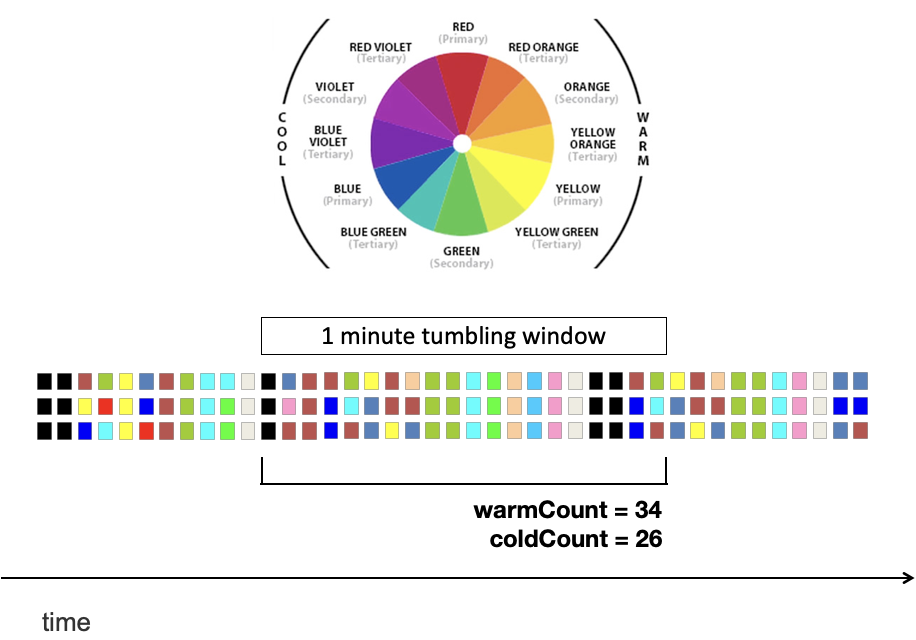

In [1]:
from IPython.display import Image
Image(filename="./images/counting-warm-and-cold-colors.png")

### Inspect the sources

- a description of the stream is available at [http://colorstream:8080/colors](http://localhost:8080/colors)
- the stream can be consumed via websocket at _ws://colorstream:5555_ (use a websocket client to inspect the data, like [this one](https://chrome.google.com/webstore/detail/simple-websocket-client/pfdhoblngboilpfeibdedpjgfnlcodoo?hl=en))

### Import rsplib and initialize the RSPEngine

In [2]:
from rsplib import RSPEngine

In [3]:
jasper = RSPEngine("http://jasper:8181/jasper")

### Define the query, specifing the query id, the t-box and the body of the query

In [4]:
qid  = 'reasoning'

In [5]:
tbox = 'https://linkeddata.stream/ontologies/colors.owl'

In [6]:
body =  ''' 
        SELECT (COUNT(?warm) AS ?warmCount) (COUNT(?cold) AS ?coldCount) 
        FROM NAMED WINDOW <colorwindow> ON <http://colorstream:8080/colors> [RANGE PT15S STEP PT5S]
        WHERE {
            { WINDOW <colorwindow> { ?warm a <http://www.streamreasoning.org/ontologies/2018/9/colors#Warm>.} }
            UNION
            { WINDOW <colorwindow> { ?cold a <http://www.streamreasoning.org/ontologies/2018/9/colors#Cold> .} }
        }
    '''        

In [7]:
reasoning_query = jasper.create(qid, body, tbox, "JSON")

In [8]:
reasoning_query.sources()

[GET http://colorstream:8080/colors]

### The stream has no endpoint

In [9]:
reasoning_query.stream().endpoints()

[]

### Create a stream endpoint


In [10]:
response = jasper.expose(qid, 'HTTP', retention=5)

In [11]:
jasper.streams()

[http://colorstream:8080/colors, http://jasper:8181/jasper/streams/reasoning]

### Inspect and call the response endpoints

In [12]:
response.endpoints()

[GET http://jasper:8182/jasper/streams/reasoning/observers/1869085722]

In [17]:
output = response.endpoints()[0].call()
output

[
    {
        "head": {
            "vars": [
                "warmCount",
                "coldCount"
            ]
        },
        "results": {
            "bindings": [
                {
                    "warmCount": {
                        "type": "literal",
                        "datatype": "http://www.w3.org/2001/XMLSchema#integer",
                        "value": "22"
                    },
                    "coldCount": {
                        "type": "literal",
                        "datatype": "http://www.w3.org/2001/XMLSchema#integer",
                        "value": "9"
                    }
                }
            ]
        }
    },
    {
        "head": {
            "vars": [
                "warmCount",
                "coldCount"
            ]
        },
        "results": {
            "bindings": [
                {
                    "warmCount": {
                        "type": "literal",
                        "datatype": "http://www.w

In [18]:
output_df = output.flatten().dataframe()[['results_bindings_0_coldCount_value', 'results_bindings_0_warmCount_value']]
output_df = output_df.astype({'results_bindings_0_coldCount_value': 'int32', 'results_bindings_0_warmCount_value': 'int32'})
output_df

,results_bindings_0_coldCount_value,results_bindings_0_warmCount_value
0,9,22
1,6,24
2,6,25


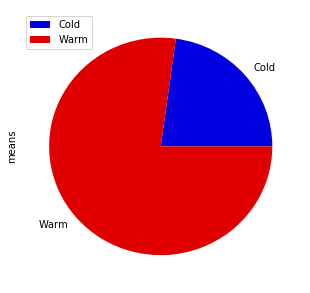

In [19]:
%matplotlib inline
import pandas as pd

coldCount_mean = output_df['results_bindings_0_coldCount_value'].sum()
warmCount_mean = output_df['results_bindings_0_warmCount_value'].sum()

df = pd.DataFrame({'means': [coldCount_mean, warmCount_mean]}, index=['Cold', 'Warm'])
plot = df.plot.pie(y='means', colors=["#0000e1", "#e10000"], figsize=(5, 5))

In [20]:
jasper.delete(qid)

{
    "@id": "queries/reasoning",
    "@type": "vprov:Task",
    "prov:generated": {
        "@id": "streams/reasoning"
    },
    "prov:uses": {
        "@id": "http://colorstream:8080/colors"
    },
    "@context": {
        "@base": "http://jasper:8181/jasper/",
        "rdf": "http://www.w3.org/1999/02/22-rdf-syntax-ns#",
        "vsd": "http://w3id.org/rsp/vocals-sd#",
        "vocals": "http://w3id.org/rsp/vocals#",
        "xsd": "http://www.w3.org/2001/XMLSchema#",
        "format": "http://www.w3.org/ns/formats/",
        "rdfs": "http://www.w3.org/2000/01/rdf-schema#",
        "vprov": "http://w3id.org/rsp/vocals-prov#",
        "dcat": "http://www.w3.org/ns/dcat#",
        "prov": "http://www.w3.org/ns/prov#"
    }
}